<a href="https://colab.research.google.com/github/velaga-9/-HEART-STROKE-PREDICTION/blob/main/MLNN_CBP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

***DATA PREPROCESSING***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLNN CBP/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Checking for null values

df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Imputing null values with mean
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


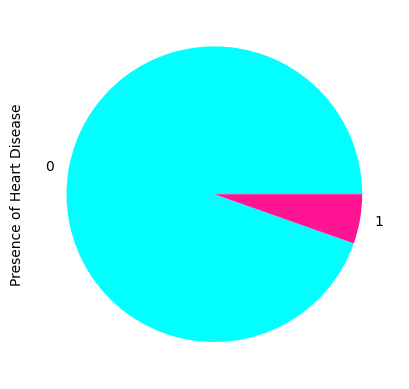

In [ ]:
class_counts = df['heart_disease'].value_counts()
colors = ['aqua', 'deeppink']
class_counts.plot(kind='pie', colors=colors)
plt.ylabel('Presence of Heart Disease')
plt.show()

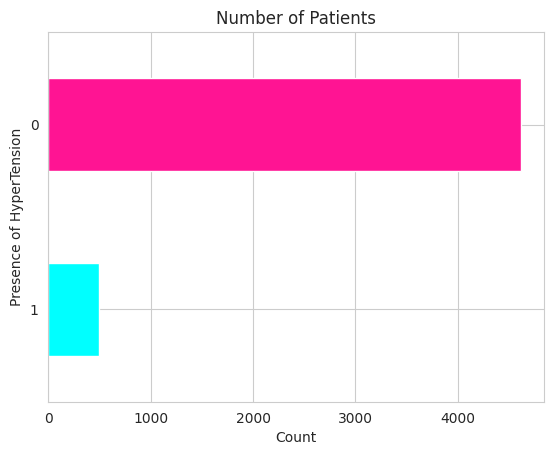

In [ ]:
hypertension_counts = df['hypertension'].value_counts().sort_values(ascending=True)
colors = ['cyan', 'deeppink']

# Create horizontal bar chart of airline counts
hypertension_counts.plot(kind='barh', color=colors)
plt.title("Number of Patients")
plt.xlabel("Count")
plt.ylabel("Presence of HyperTension")
plt.show()


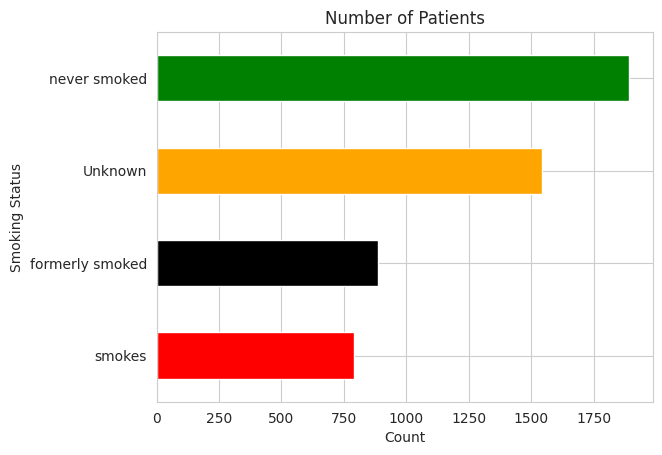

In [ ]:
smoking_counts = df['smoking_status'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['red', 'black', 'orange', 'green']

# Create horizontal bar chart of airline counts
smoking_counts.plot(kind='barh', color=colors)
plt.title("Number of Patients")
plt.xlabel("Count")
plt.ylabel("Smoking Status")
plt.show()

In [ ]:
# IDENTIFYING CATEGORICAL VARIABLES IN THE DATASET

cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 4
Categorical columns:
['ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for feature in cat_cols:
  df[feature]= label_encoder.fit_transform(df[feature])
  print(df[feature].value_counts())
  print()

1    3353
0    1757
Name: ever_married, dtype: int64

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

1    2596
0    2514
Name: Residence_type, dtype: int64

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64



In [ ]:
# SETTING TARGET VARIABLES

y = df['stroke']

# Extract the input features
X = df.drop(['stroke'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train.shape, y_train.shape

((3577, 11), (3577,))

In [ ]:
#SMOTE: Synthetic Minority Over-sampling TEchnique

from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train.shape, y_train.shape, X_train_resampled.shape, y_train_resampled.shape

((3577, 11), (3577,), (6786, 11), (6786,))

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model to the training data
model = LogisticRegression(solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score
log_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", log_accuracy)

Accuracy: 0.7827788649706457


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10)

dt.fit(X_train_resampled, y_train_resampled)

y_pred = dt.predict(X_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

dt_accuracy=accuracy_score(y_pred, y_test)
print('Accuracy: ', dt_accuracy)

Accuracy:  0.7097195042400521


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

rf_accuracy=accuracy_score(y_pred, y_test)
print('Accuracy: ', rf_accuracy)

Accuracy:  0.8264840182648402


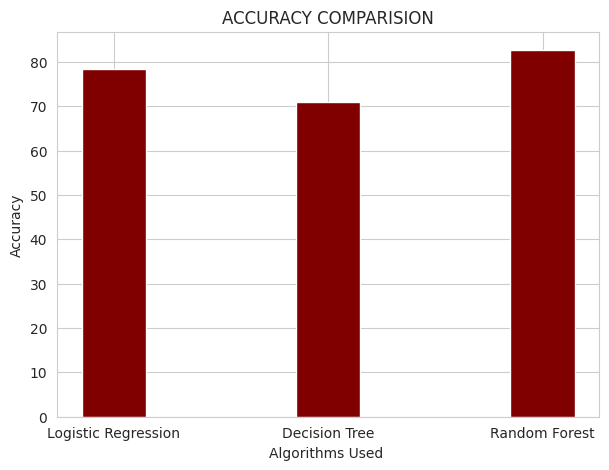

In [ ]:
import matplotlib.pyplot as plt

algo=['Logistic Regression','Decision Tree','Random Forest']
values=[log_accuracy*100 ,dt_accuracy*100 ,rf_accuracy*100 ]

fig = plt.figure(figsize = (7, 5))

# creating the bar plot
plt.bar(algo, values, color ='maroon',width = 0.3)

plt.xlabel("Algorithms Used ")
plt.ylabel("Accuracy")
plt.title("ACCURACY COMPARISION")
plt.show()